# Air quality and pollution assessment

https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
# import data in a pandas dataframe
pollution_data = pd.read_csv("updated_pollution_dataset.csv")

In [8]:
# first lines of the dataset
pollution_data.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

In [10]:
# size of the dataset
pollution_data.shape

(5000, 10)

In [12]:
# global information
pollution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [14]:
# Does dataset contain missing values ?
missing_values = pollution_data.isnull().sum()
missing_values

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

No missing value

In [18]:
# Does dataset contain duplicated data ?
pollution_data.duplicated().sum()

0

No duplicated data

In [13]:
# basic statistic on numerical variables
pollution_data.describe()

Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                       2.500000   
25%       5.100000     1.030000                       5.400000   
50%       8.000000     1.410000                       7.900000   
75%      13.725000     1.840000                      11.100000   
max      44.900000     3.720000                      25.800000   

       Population_Density  
count         5000.000000  
mean           497.423800  
std            152.754084  
min            188.000000  
25%            381.000000  
50%            494.000000  
75%            600.000000  
max            957.000000

In [19]:
# check of typo issue in the variable name
pollution_data.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

No typo issue

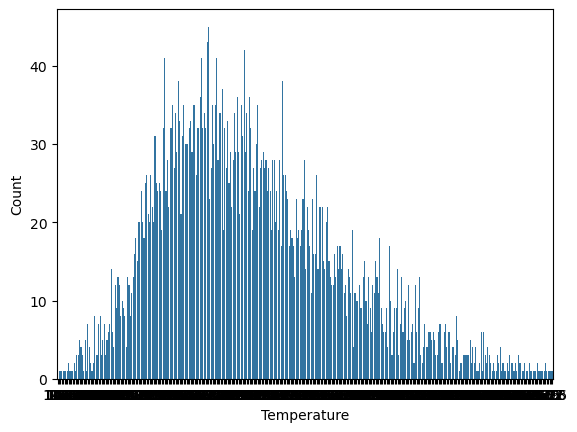

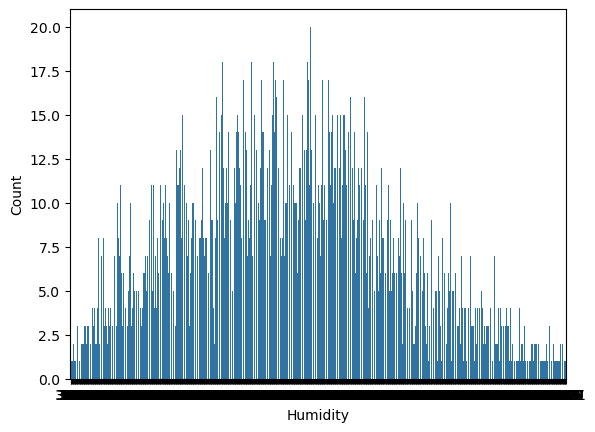

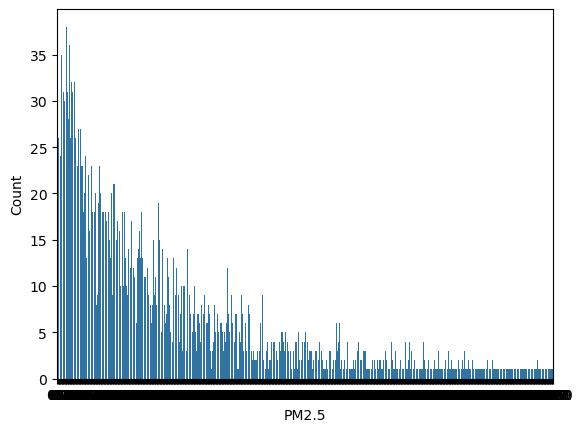

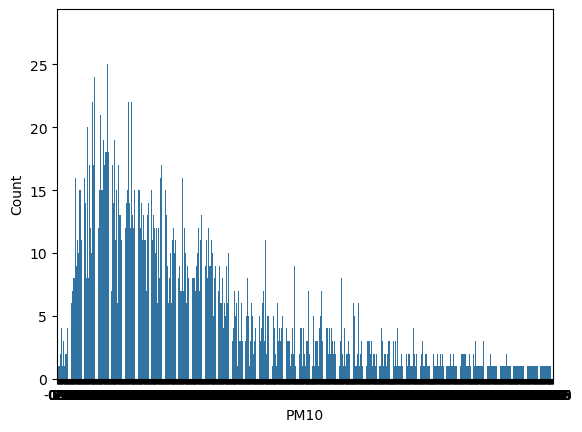

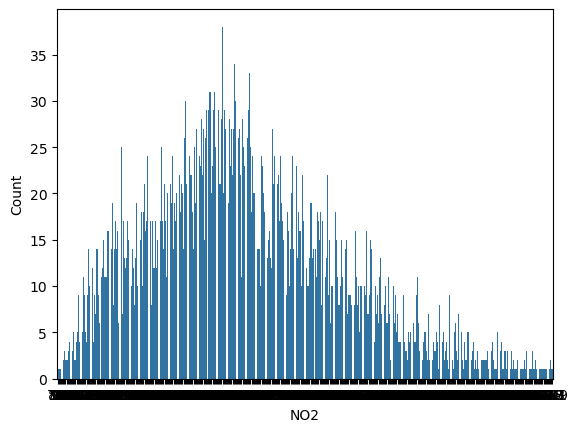

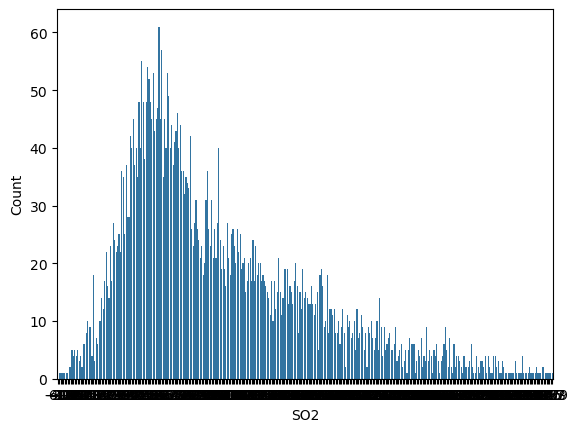

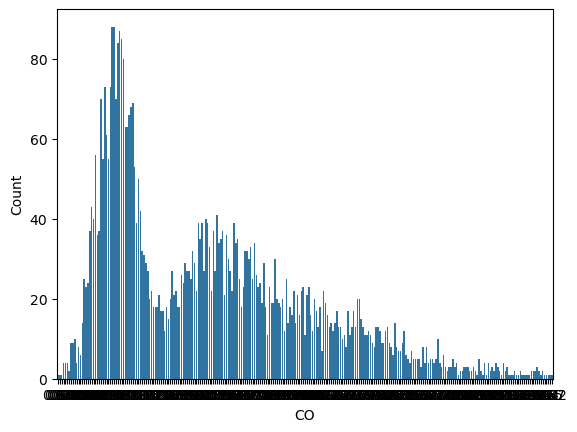

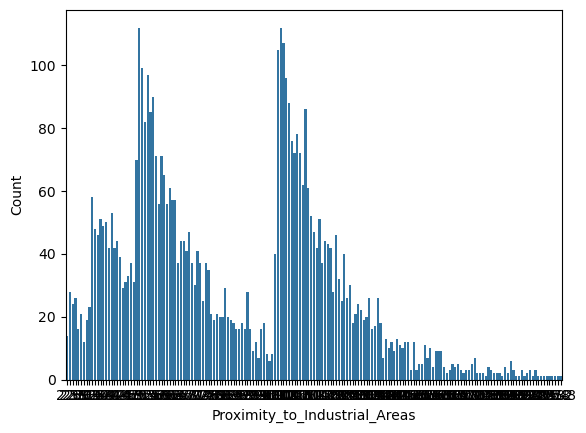

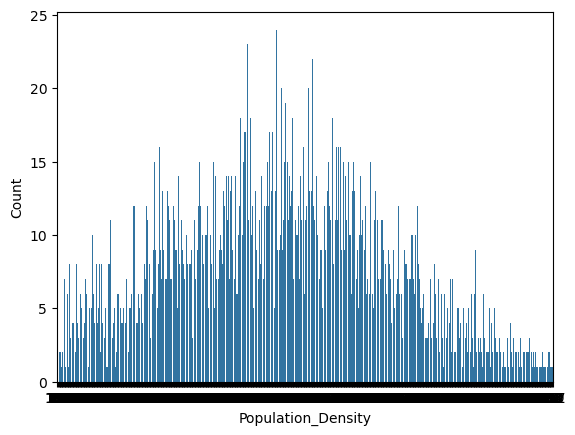

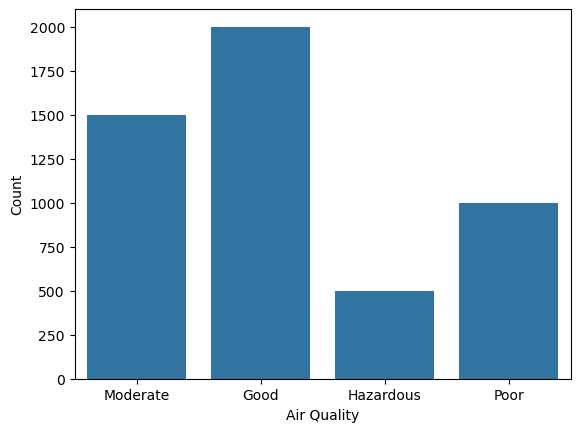

In [23]:
#data distribution for each variable
for col_name in pollution_data.columns:
    sns.countplot(data=pollution_data, x=col_name)
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.show()

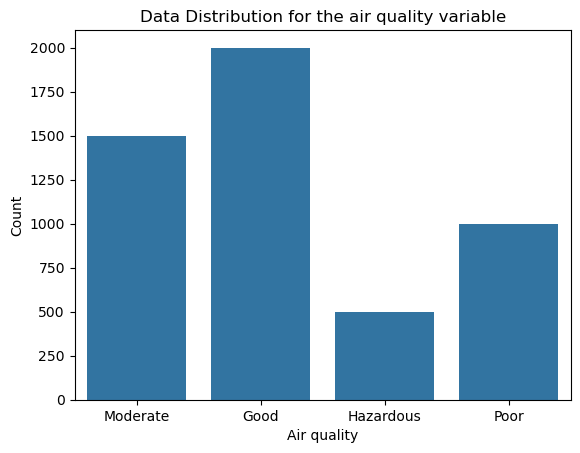

In [36]:
# data distribution for the air quality variable
sns.countplot(data=pollution_data, x='Air Quality')
plt.xlabel("Air quality")
plt.ylabel("Count")
plt.title("Data Distribution for the air quality variable")
plt.show()

In [40]:
# count entries per air quality category
count_airQuality = pollution_data['Air Quality'].value_counts()
count_airQuality

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [44]:
# create a dataframe
count_airQuality_df = count_airQuality.to_frame()
count_airQuality_df.reset_index()

Air Quality  count
0        Good   2000
1    Moderate   1500
2        Poor   1000
3   Hazardous    500

In [46]:
# compute percent per air quality category for the report
count_airQuality_df["percent"] = (count_airQuality_df["count"] / 5000) *100
count_airQuality_df

count  percent
Air Quality                
Good          2000     40.0
Moderate      1500     30.0
Poor          1000     20.0
Hazardous      500     10.0

In [109]:
# extract numerical variables and compute linear correlation coefficient
numerical_data = pollution_data.select_dtypes(include=['number'])
corr_matrix = numerical_data.corr() # compute pairwise correlation of columns based on Pearson coefficient
corr_matrix

Temperature  Humidity     PM2.5      PM10  \
Temperature                       1.000000  0.466456  0.323840  0.425690   
Humidity                          0.466456  1.000000  0.273366  0.359156   
PM2.5                             0.323840  0.273366  1.000000  0.973005   
PM10                              0.425690  0.359156  0.973005  1.000000   
NO2                               0.591969  0.491977  0.333004  0.439916   
SO2                               0.568082  0.459804  0.299582  0.401849   
CO                                0.685258  0.567540  0.395179  0.518895   
Proximity_to_Industrial_Areas    -0.589564 -0.479646 -0.315766 -0.425018   
Population_Density                0.481692  0.411630  0.278957  0.365734   

                                    NO2       SO2        CO  \
Temperature                    0.591969  0.568082  0.685258   
Humidity                       0.491977  0.459804  0.567540   
PM2.5                          0.333004  0.299582  0.395179   
PM10                           0.439916  0.401849  0.518895   
NO2                            1.000000  0.571839  0.710792   
SO2                            0.571839  1.000000  0.679060   
CO                             0.710792  0.679060  1.000000   
Proximity_to_Industrial_Areas -0.607710 -0.570385 -0.707581   
Population_Density             0.510938  0.475242  0.593389   

                               Proximity_to_Industrial_Areas  \
Temperature                                        -0.589564   
Humidity                                           -0.479646   
PM2.5                                              -0.315766   
PM10                                               -0.425018   
NO2                                                -0.607710   
SO2                                                -0.570385   
CO                                                 -0.707581   
Proximity_to_Industrial_Areas                       1.000000   
Population_Density                                 -0.498058   

                               Population_Density  
Temperature                              0.481692  
Humidity                                 0.411630  
PM2.5                                    0.278957  
PM10                                     0.365734  
NO2                                      0.510938  
SO2                                      0.475242  
CO                                       0.593389  
Proximity_to_Industrial_Areas           -0.498058  
Population_Density                       1.000000

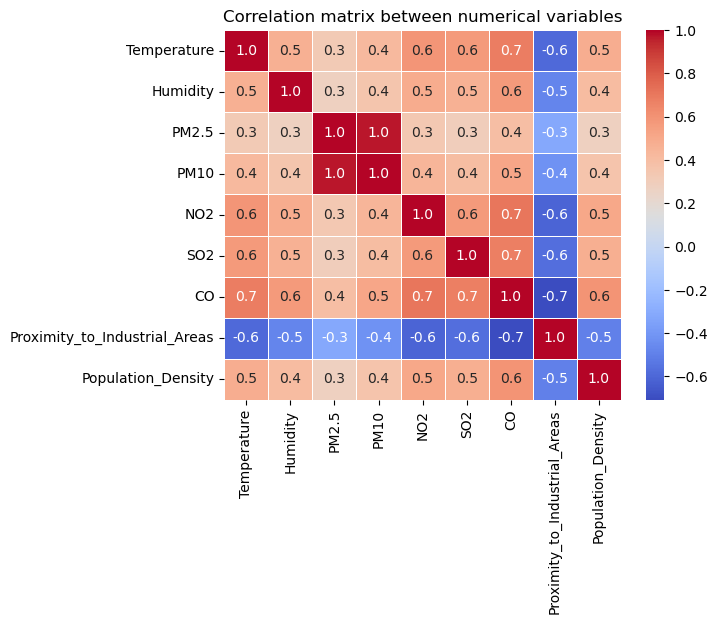

In [115]:
# visualize linear correlation between numerical variables
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.4)
plt.title('Correlation matrix between numerical variables')
plt.show()

PM2.5 and PM10 polluants seem to be directly linked meaning that when on polluant is present the other on is present too. \
A link between CO, temperature, NO2 and SO2 is also obseved but not at a high level.

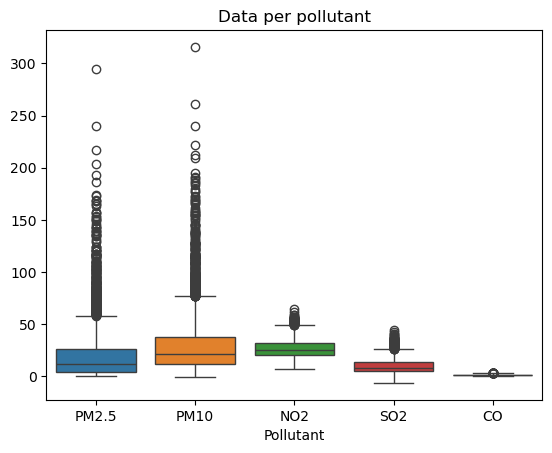

In [57]:
# visualize data per polluant
sns.boxplot(data=pollution_data[["PM2.5", "PM10", "NO2", "SO2", "CO"]])
plt.xlabel("Pollutant")
plt.title("Data per pollutant")
#plt.savefig("data dist per pollutant.png")
plt.show()

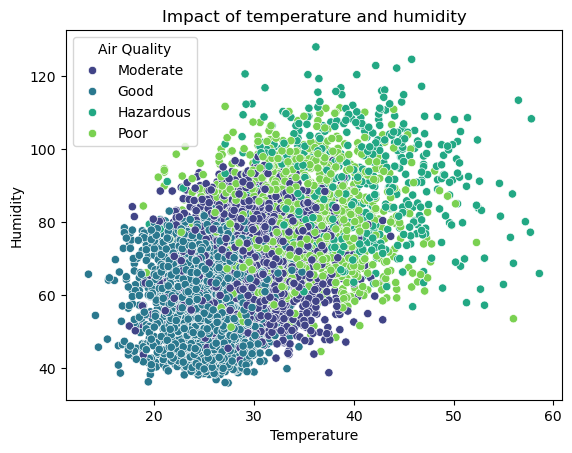

In [41]:
# visualization of the impact of temperature and humidity on air quality
sns.scatterplot(data=pollution_data, x='Temperature', y='Humidity', hue='Air Quality', palette="viridis")
plt.title("Impact of temperature and humidity")
plt.show()

In [61]:
# polluants studies
pollutants_list = ["PM2.5", "PM10", "NO2", "SO2", "CO"]

Particulate matter (PM) includes microscopic matter suspended in air or water. Airborne particles are called aerosols. PM10 includes particles less than 10 µm in diameter, PM2.5 those less than 2.5 µm. 
The toxicity of suspended particles is mainly due to particles with a diameter of less than 10µm. They can be emitted directly into the air from anthropogenic activities (industry, residential, agriculture, transport) and natural sources (forest fires, volcanic eruptions, etc.). Particles can also be formed directly in the atmosphere by physico-chemical reactions between pollutants already present in the atmospher Most studies indicate PM2.5 at or below 12 μg/m3 is considered healthy with little to no risk from exposure. If the level goes to or above 35 μg/m3 during a 24-hour period, the air is considered unhealthy and can cause issues for people with existing breathing issues such as asthma.
 
Known as nitrogen dioxide, NO2 belongs to the family of nitrogen oxides, NO. Its two members, nitrogen monoxide and dioxide, are the major pollutants in the earth's atmosphere. The NO2 hourly mean value may not exceed 200 micrograms per cubic metre (µg/m3) more than 18 times in a year and the NO2 annual mean value may not exceed 40 micrograms per cubic metre.

Sulfur dioxide (SO2) is an acidifying gaseous air pollutant that can cause environmental acidification if concentrations are too high. Once released into the air and in the presence of water, SO2 transforms into sulfuric acid H2SO4, triggering the phenomenon of acid rain. The maximum concentration for exposures of 0.5 to 1 hour is considered to be 50 to 100 ppm. It has been reported that 400 to 500 ppm is considered dangerous for even short periods of exposure [Henderson and Haggard 1943].

Carbon monoxide (CO) is a polluting gas, dangerous in high concentrations, which can now be found mainly in confined environments. The WHO recommends limiting exposure to 9 ppm CO for 8 hours, 26 ppm CO for 1 hour, 52 ppm CO for 30 minutes, and 87 ppm CO for 15 minutes.e.

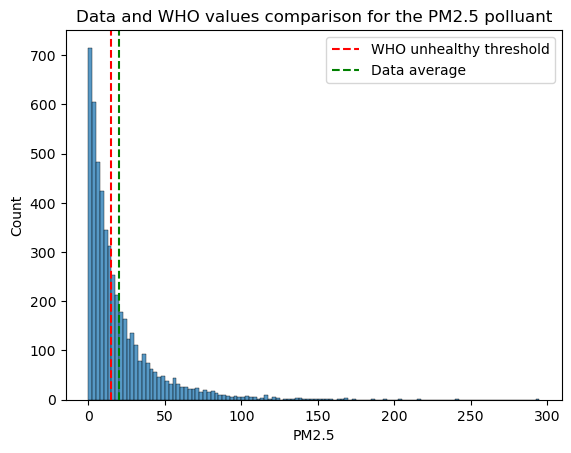

In [85]:
# PM2.5 data versus WHO threshold
sns.histplot(pollution_data["PM2.5"])
plt.axvline(15, color='r', linestyle='--', label='WHO unhealthy threshold')
plt.axvline(20, color='g', linestyle='--', label='Data average')
plt.legend()
plt.title("Data and WHO values comparison for the PM2.5 polluant")
plt.show()

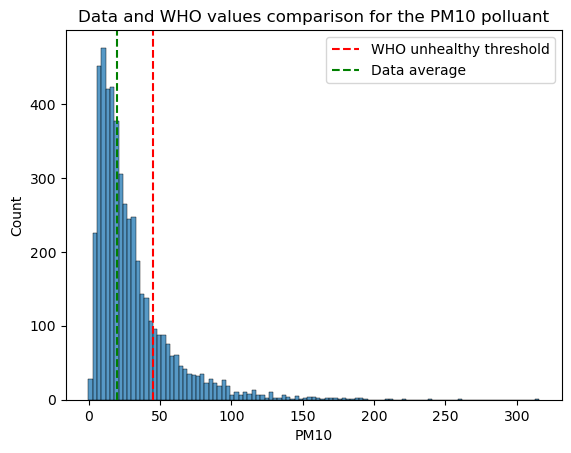

In [87]:
# PM10 data versus WHO threshold
sns.histplot(pollution_data["PM10"])
plt.axvline(45, color='r', linestyle='--', label='WHO unhealthy threshold')
plt.axvline(20, color='g', linestyle='--', label='Data average')
plt.legend()
plt.title("Data and WHO values comparison for the PM10 polluant")
plt.show()

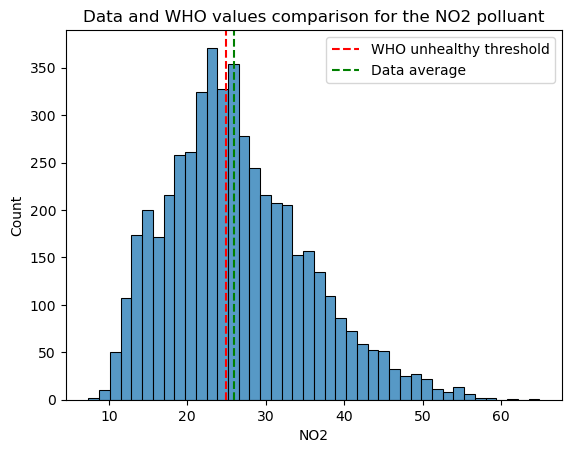

In [89]:
# NO2 data versus WHO threshold
sns.histplot(pollution_data["NO2"])
plt.axvline(25, color='r', linestyle='--', label='WHO unhealthy threshold')
plt.axvline(26, color='g', linestyle='--', label='Data average')
plt.legend()
plt.title("Data and WHO values comparison for the NO2 polluant")
plt.show()

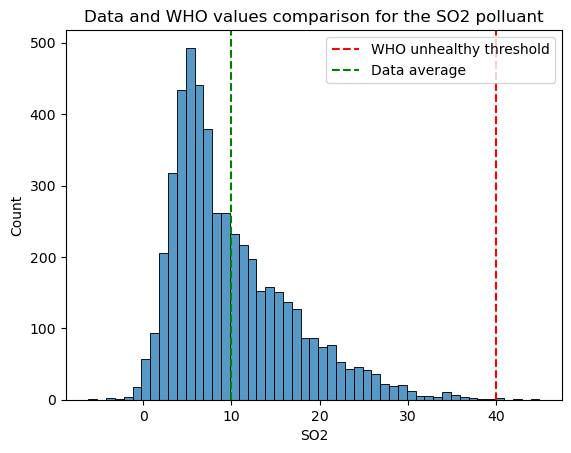

In [91]:
# SO2 data versus WHO threshold
sns.histplot(pollution_data["SO2"])
plt.axvline(40, color='r', linestyle='--', label='WHO unhealthy threshold')
plt.axvline(10, color='g', linestyle='--', label='Data average')
plt.legend()
plt.title("Data and WHO values comparison for the SO2 polluant")
plt.show()

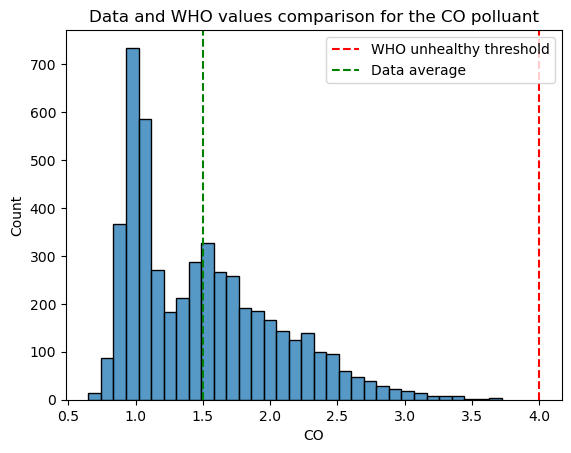

In [93]:
# CO data versus WHO threshold
sns.histplot(pollution_data["CO"])
plt.axvline(4, color='r', linestyle='--', label='WHO unhealthy threshold')
plt.axvline(1.5, color='g', linestyle='--', label='Data average')
plt.legend()
plt.title("Data and WHO values comparison for the CO polluant")
plt.show()

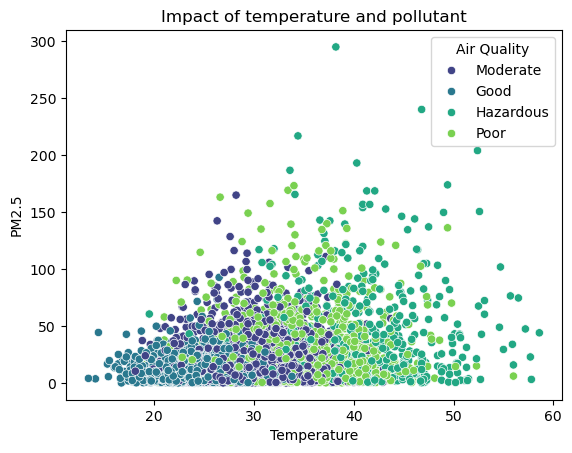

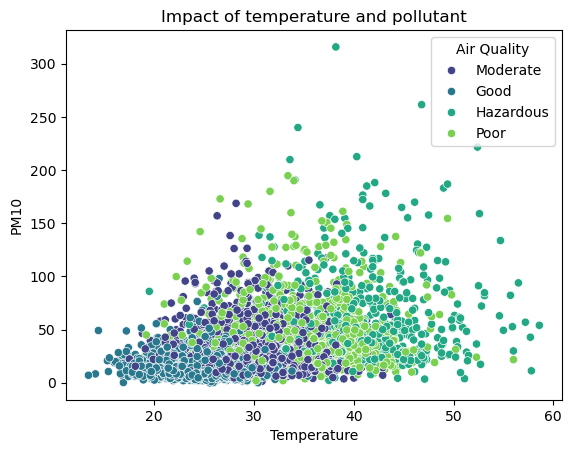

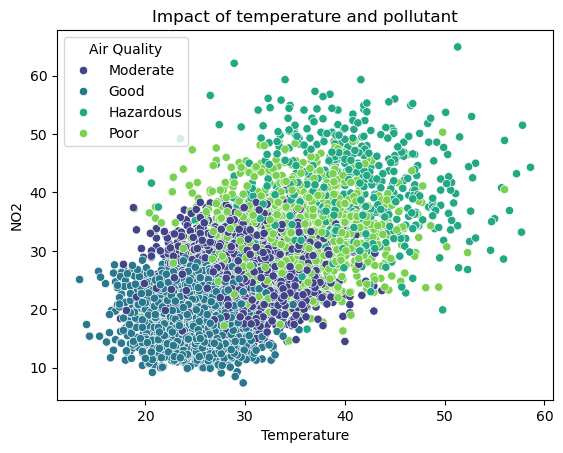

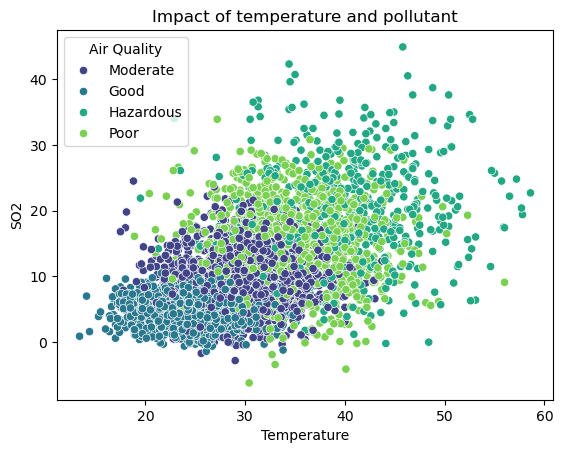

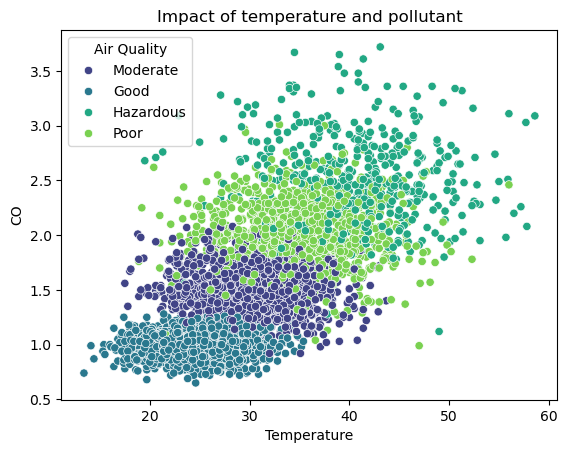

In [71]:
# Impact of the temperature and polluants on the air quality
for pollutant in pollutants_list:
    sns.scatterplot(data=pollution_data, x='Temperature', y=pollutant, hue='Air Quality', palette="viridis")
    plt.xlabel("Temperature")
    plt.ylabel(pollutant)
    plt.title("Impact of temperature and pollutant")
    plt.show()

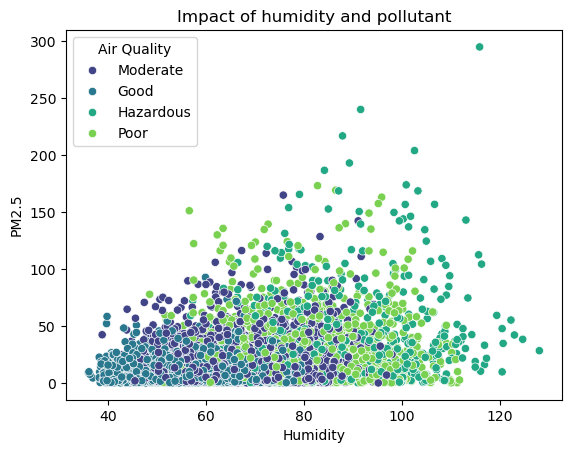

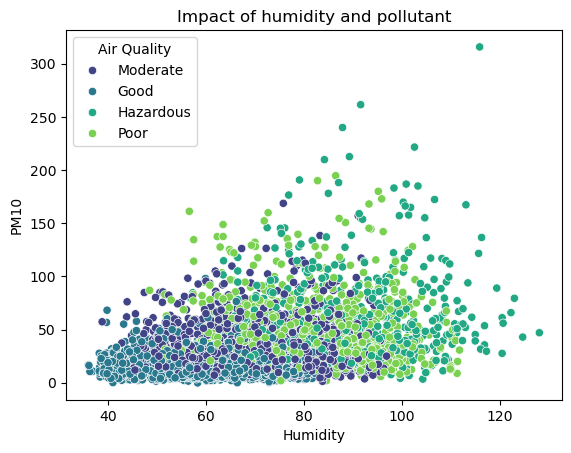

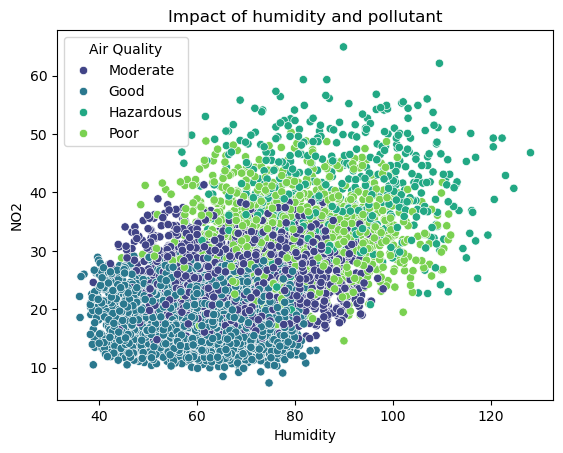

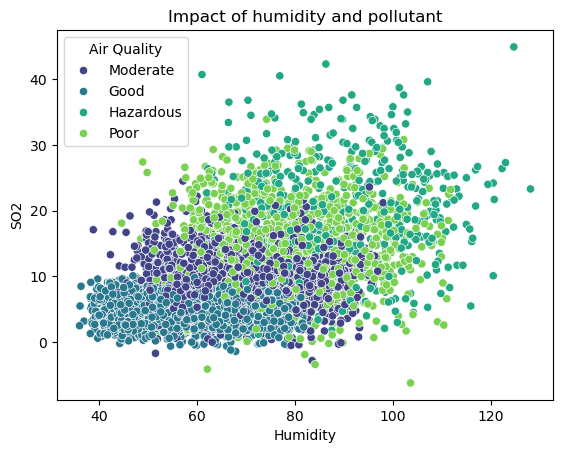

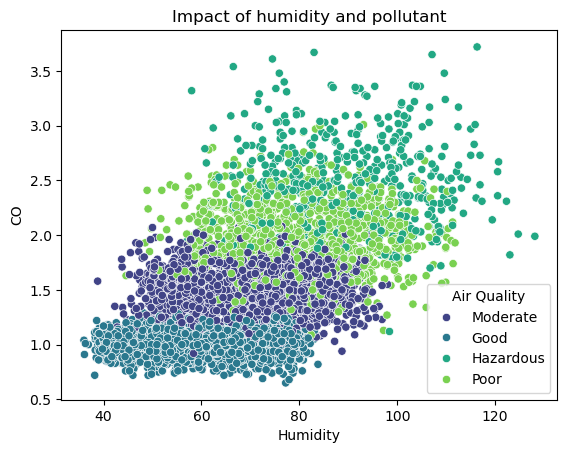

In [75]:
# Impact of the humidity and polluants on the air quality
for pollutant in pollutants_list:
    sns.scatterplot(data=pollution_data, x='Humidity', y=pollutant, hue='Air Quality', palette="viridis")
    plt.xlabel("Humidity")
    plt.ylabel(pollutant)
    plt.title("Impact of humidity and pollutant")
    plt.show()

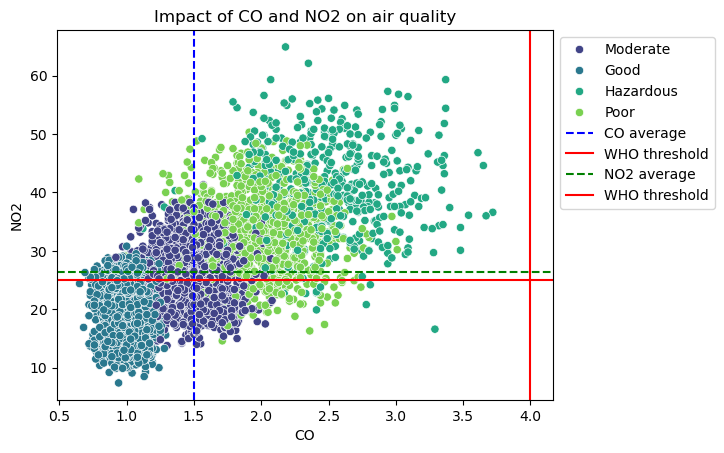

In [134]:
ax = sns.scatterplot(data=pollution_data, x='CO', y="NO2", hue='Air Quality', palette="viridis")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.axvline(1.5, color='b', linestyle='--', label='CO average')
plt.axvline(4, color='r', linestyle='-', label='WHO threshold')
plt.axhline(y=26.4, color='g', linestyle='--', label='NO2 average')
plt.axhline(y=25, color='r', linestyle='-', label='WHO threshold')
plt.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("CO")
plt.ylabel("NO2")
plt.title("Impact of CO and NO2 on air quality")
plt.show()

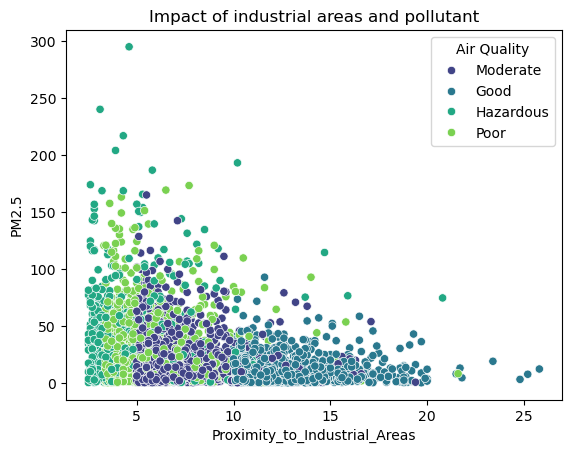

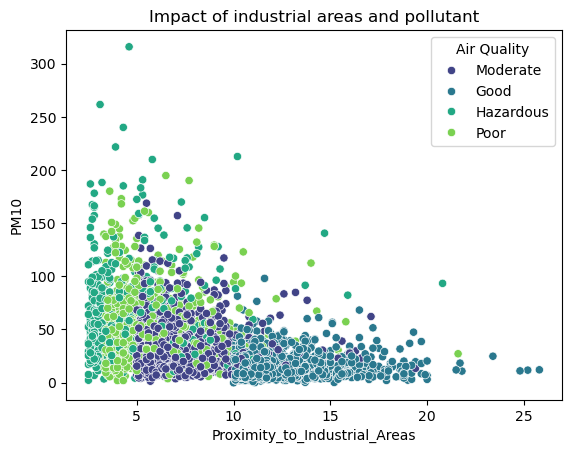

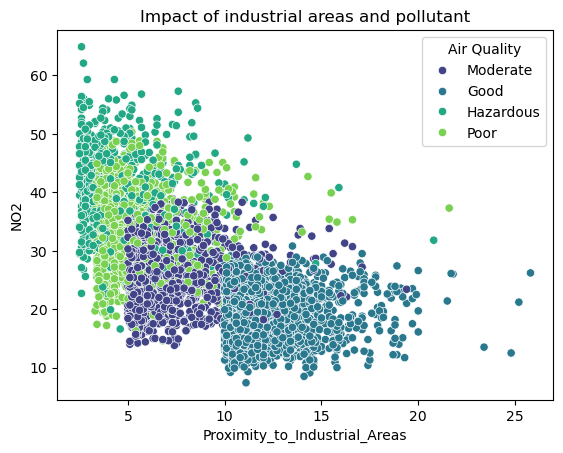

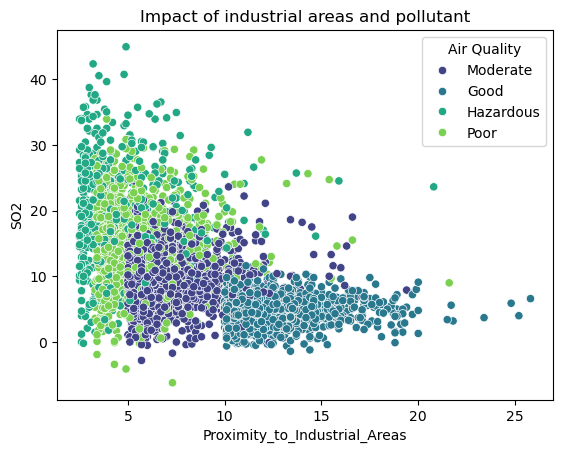

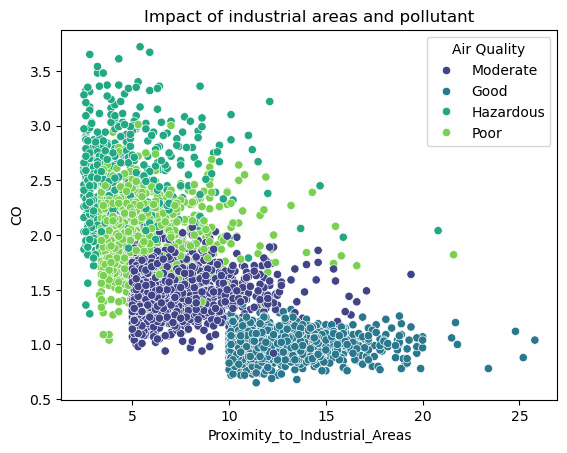

In [85]:
for pollutant in pollutants_list:
    sns.scatterplot(data=pollution_data, x='Proximity_to_Industrial_Areas', y=pollutant, hue='Air Quality', palette="viridis")
    plt.xlabel("Proximity_to_Industrial_Areas")
    plt.ylabel(pollutant)
    plt.title("Impact of industrial areas and pollutant")
    plt.show()

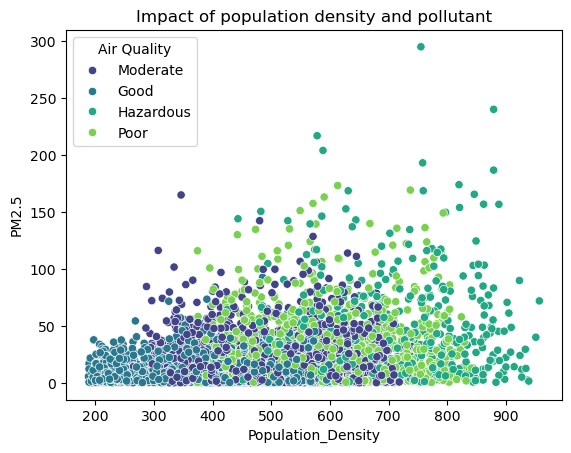

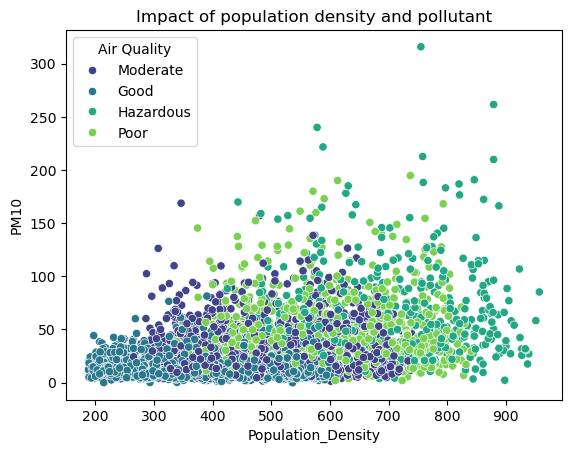

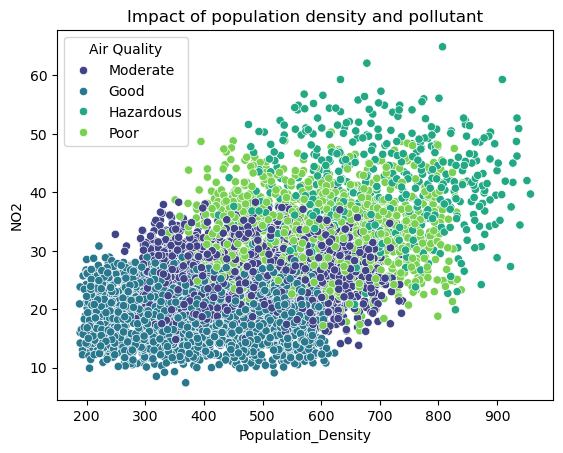

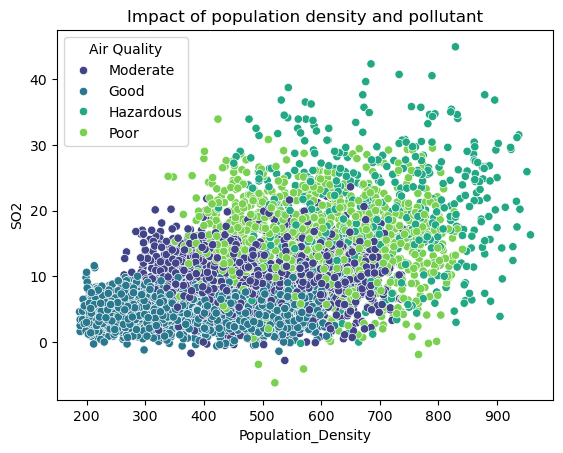

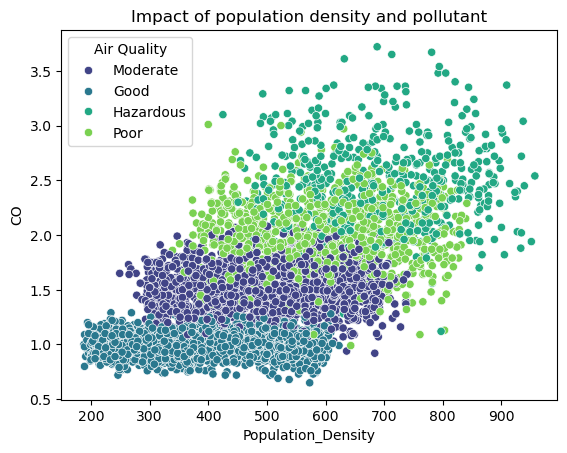

In [87]:
for pollutant in pollutants_list:
    sns.scatterplot(data=pollution_data, x='Population_Density', y=pollutant, hue='Air Quality', palette="viridis")
    plt.xlabel("Population_Density")
    plt.ylabel(pollutant)
    plt.title("Impact of population density and pollutant")
    plt.show()

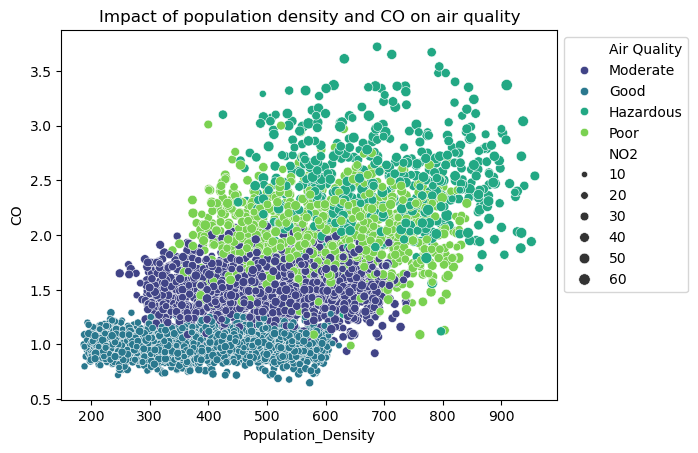

In [174]:
ax = sns.scatterplot(data=pollution_data, x='Population_Density', y="CO", size="NO2", hue='Air Quality', palette="viridis")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Population_Density")
plt.ylabel(pollutant)
plt.title("Impact of population density and CO on air quality")
plt.show()

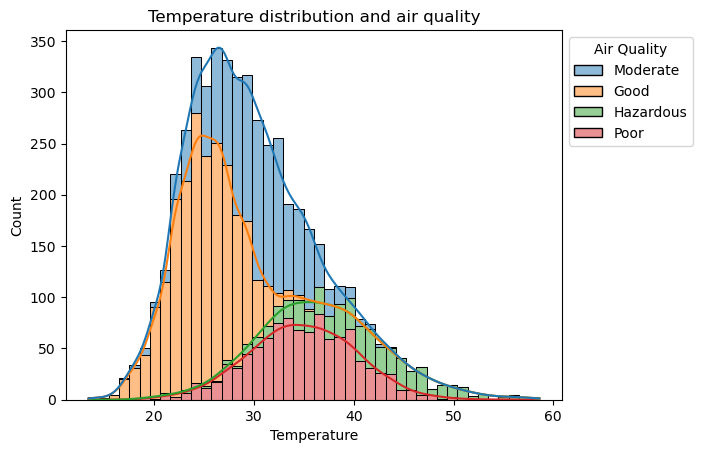

In [107]:
ax = sns.histplot(data=pollution_data, x='Temperature', hue='Air Quality', multiple='stack', kde=True, alpha=0.5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Temperature distribution and air quality')
plt.show()

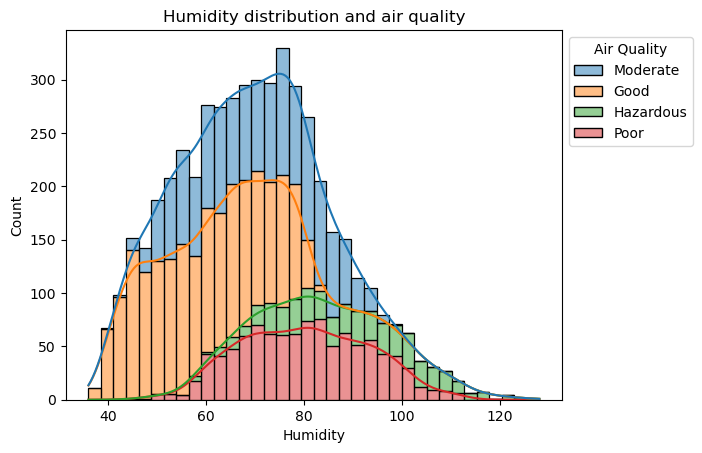

In [99]:
ax = sns.histplot(data=pollution_data, x='Humidity', hue='Air Quality', multiple='stack', kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Humidity distribution and air quality')
plt.show()

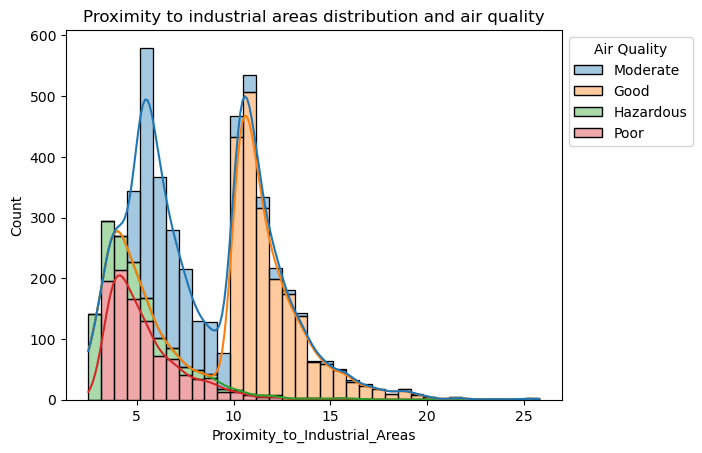

In [182]:
ax = sns.histplot(data=pollution_data, x='Proximity_to_Industrial_Areas', hue='Air Quality', multiple='stack', kde=True, alpha=0.4)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Proximity to industrial areas distribution and air quality')
plt.show()

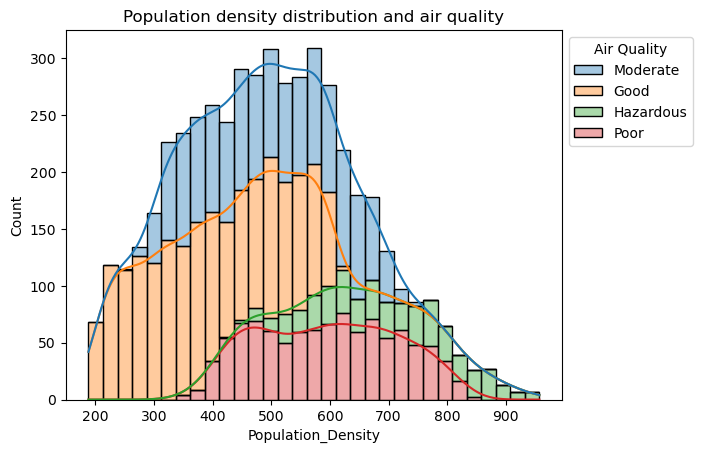

In [184]:
ax = sns.histplot(data=pollution_data, x='Population_Density', hue='Air Quality', multiple='stack', kde=True, alpha=0.4)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Population density distribution and air quality')
plt.show()

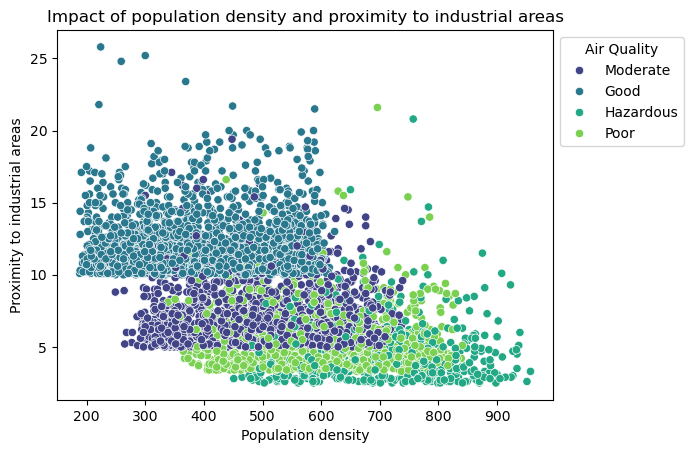

In [228]:
ax = sns.scatterplot(data=pollution_data, x='Population_Density', y="Proximity_to_Industrial_Areas", hue='Air Quality', palette="viridis")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Population density")
plt.ylabel("Proximity to industrial areas")
plt.title("Impact of population density and proximity to industrial areas")
plt.show()

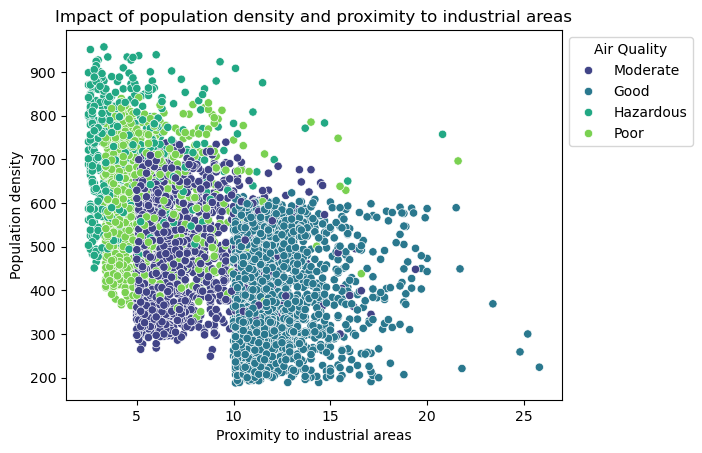

In [226]:
ax = sns.scatterplot(data=pollution_data, x="Proximity_to_Industrial_Areas", y='Population_Density', hue='Air Quality', palette="viridis")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Proximity to industrial areas")
plt.ylabel("Population density")
plt.title("Impact of population density and proximity to industrial areas")
plt.show()

In [99]:
# statistical test
x=pollution_data.drop("Air Quality",axis=1)
y=pollution_data["Air Quality"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [101]:
classifier={
    "Random Forest Classifier":RandomForestClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Naive Bayes Classifier":GaussianNB(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

In [103]:
for name, clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print("Model :", f"{name}")
    print("Model accuracy :", f"{accuracy*100}")
    print("Report : \n", classification_report(y_test,y_pred))
    print("_"*60)

Model : Random Forest Classifier
Model accuracy : 95.3
Report : 
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.90      0.86      0.88       111
    Moderate       0.96      0.97      0.96       294
        Poor       0.86      0.89      0.88       186

    accuracy                           0.95      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.95      0.95      0.95      1000

____________________________________________________________
Model : Ada Boost Classifier
Model accuracy : 85.9
Report : 
               precision    recall  f1-score   support

        Good       0.99      1.00      0.99       409
   Hazardous       0.70      0.75      0.72       111
    Moderate       0.92      0.81      0.86       294
        Poor       0.62      0.70      0.66       186

    accuracy                           0.86      1000
   macro avg       0.81      0.81      0.81      1

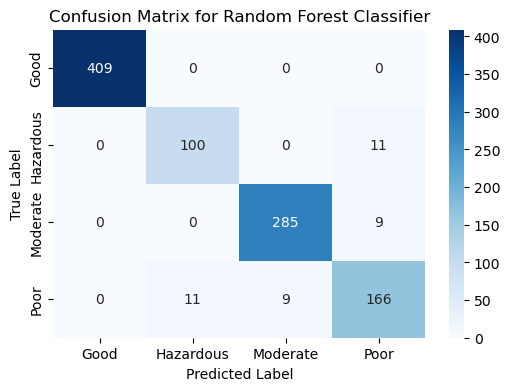

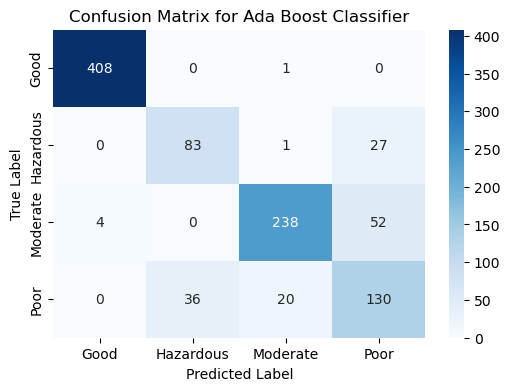

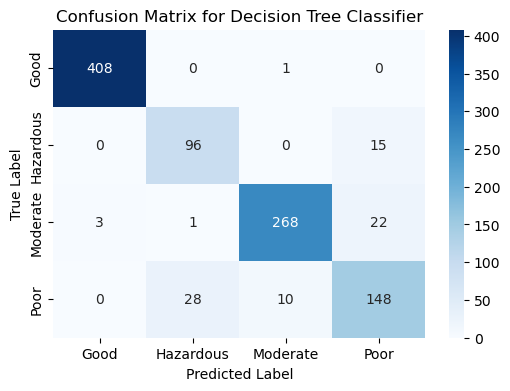

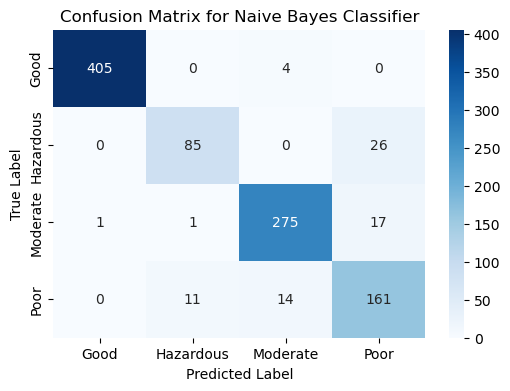

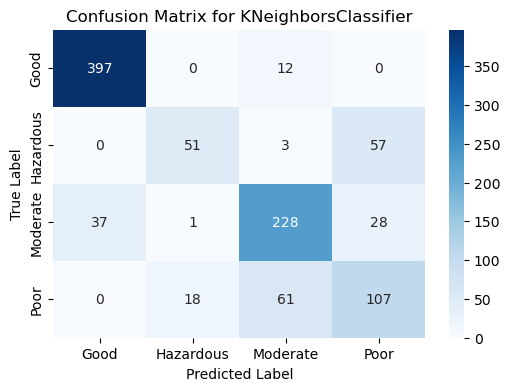

In [105]:
accuracy_results={}

for name, clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

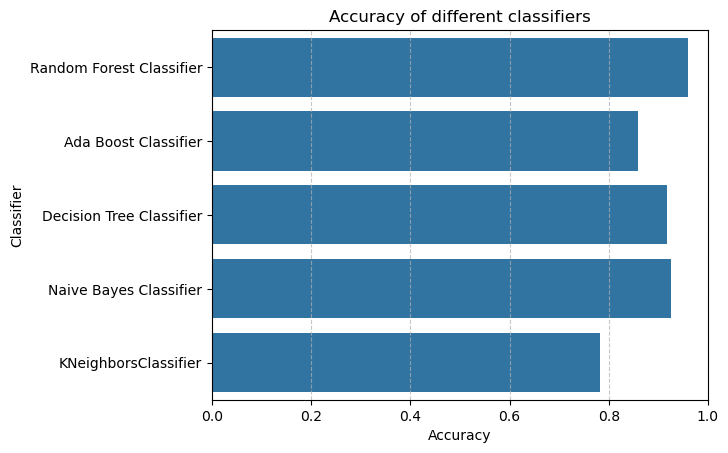

In [270]:
accuracy_df = pd.DataFrame(accuracy_results.items(), columns=["Classifier","Accuracy"])

#plt.figure(figsize=(10, 8))
sns.barplot(x="Accuracy", y="Classifier", data=accuracy_df)
plt.title("Accuracy of different classifiers")
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.xlim(0, 1) 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

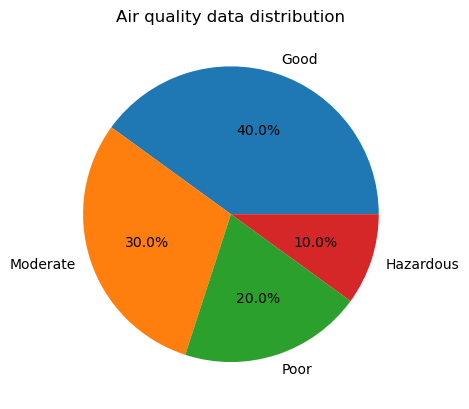

In [52]:
target = pollution_data['Air Quality'].value_counts()

plt.pie(target, labels=target.index, autopct='%1.1f%%')
plt.title("Air quality data distribution")
#plt.savefig("piePlot_airQuality.png")
plt.show()

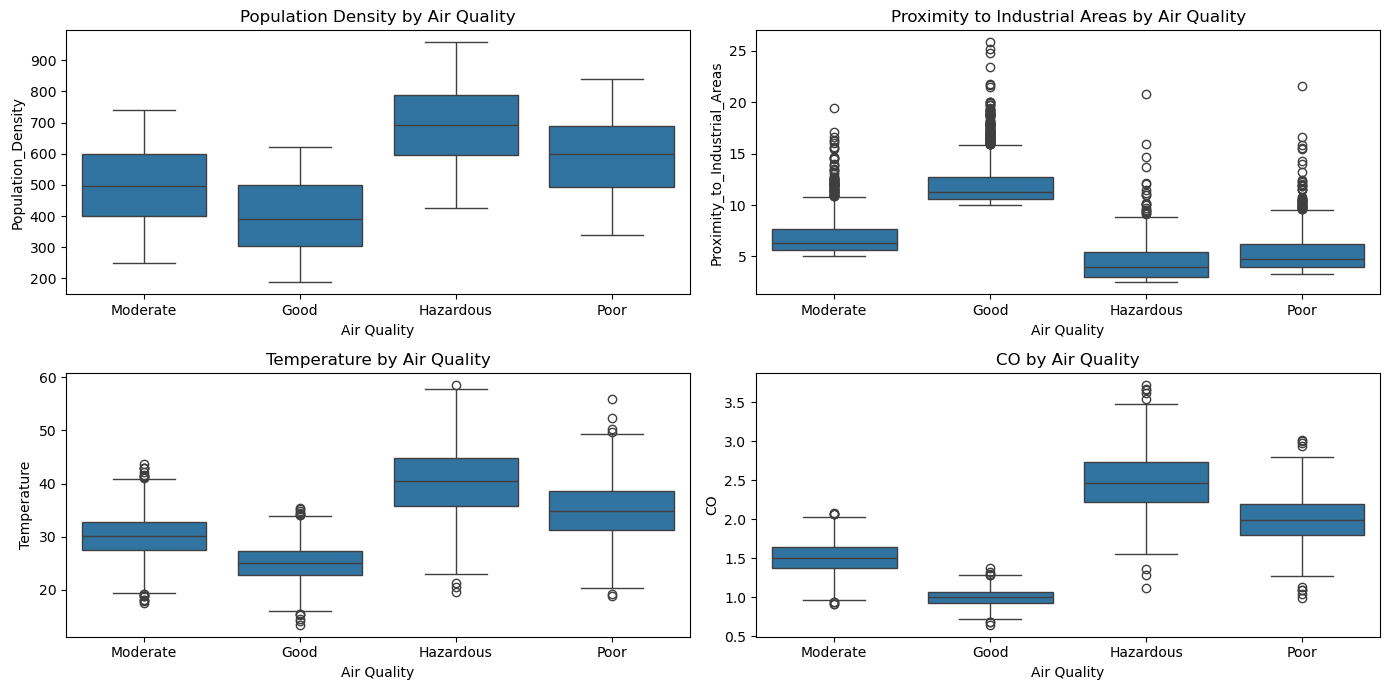

In [236]:
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

sns.boxplot(x='Air Quality', y='Population_Density', data=pollution_data, ax=axs[0,0])
axs[0,0].set_title('Population Density by Air Quality')

sns.boxplot(x='Air Quality', y='Proximity_to_Industrial_Areas', data=pollution_data, ax=axs[0,1])
axs[0,1].set_title('Proximity to Industrial Areas by Air Quality')

sns.boxplot(x='Air Quality', y='Temperature', data=pollution_data, ax=axs[1,0])
axs[1,0].set_title('Temperature by Air Quality')

sns.boxplot(x='Air Quality', y='CO', data=pollution_data, ax=axs[1,1])
axs[1,1].set_title('CO by Air Quality')

plt.tight_layout()
plt.show()

In [ ]:
for i, column in pollution_data:
    plt.subplot(3, 3, i)  # Adjust the layout to 3x3 grid
    sns.kdeplot(data=outlier_dataset, x=column, hue='Air Quality', fill=True, palette='muted')
    plt.title(f"{column}")
    plt.tight_layout()

plt.show()

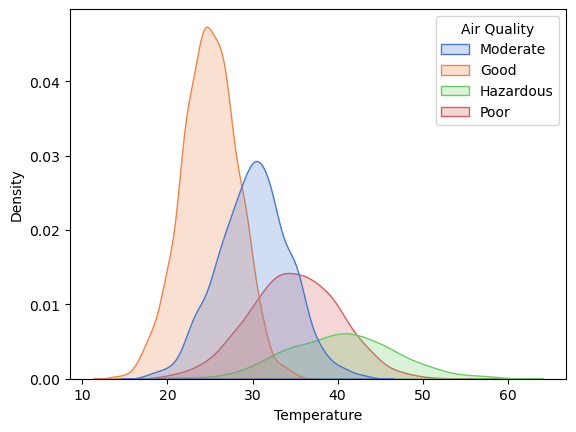

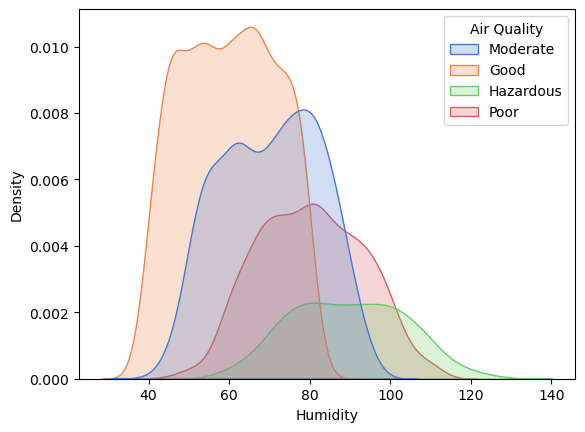

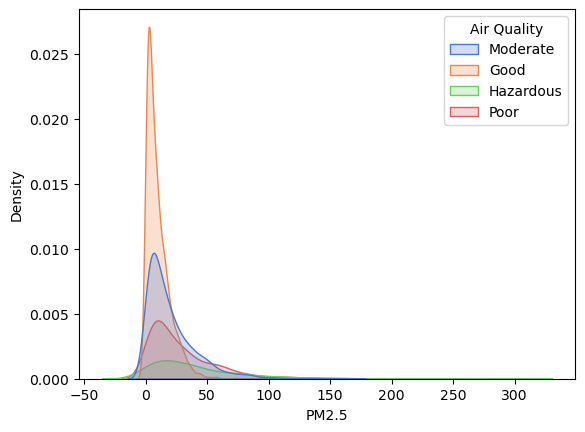

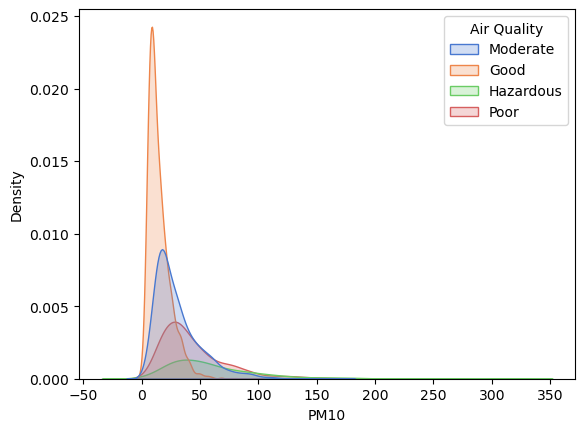

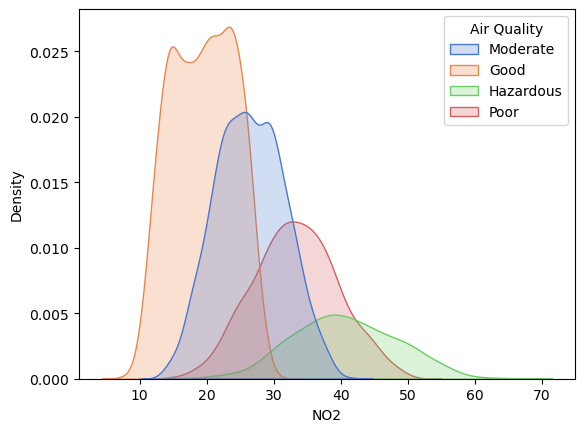

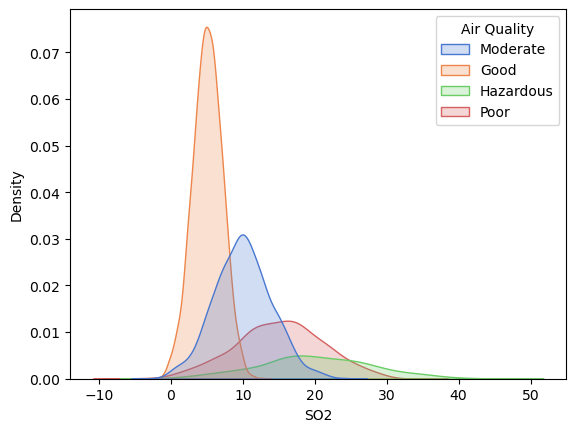

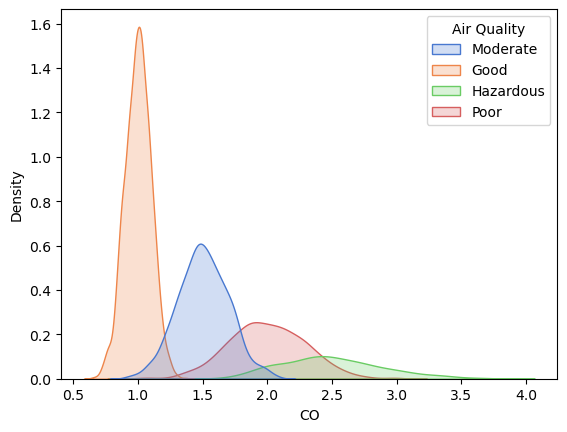

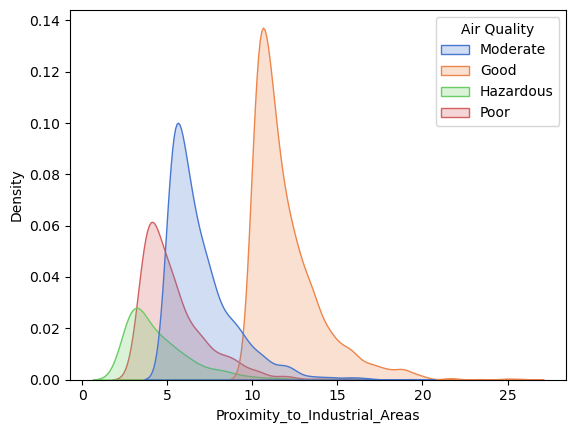

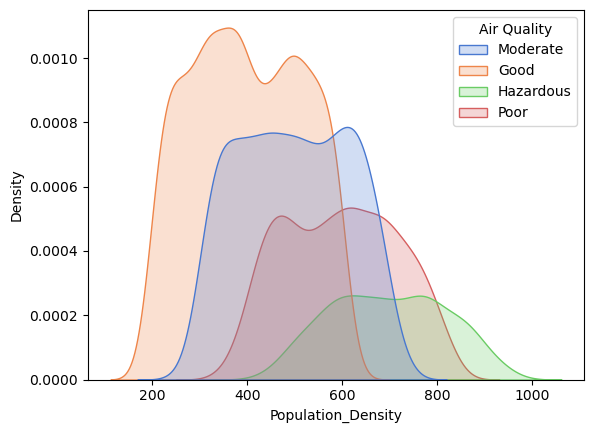

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

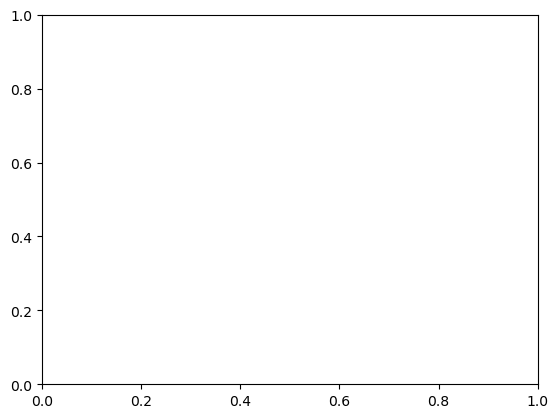

In [308]:
for col_name in pollution_data.columns:
    sns.kdeplot(data=pollution_data, x=col_name, hue='Air Quality', fill=True, palette='muted')
    plt.xlabel(col_name)
    plt.show()

In [292]:
# create new column to convert the categorical "Air quality" into integrer
pollution_data["numeric quality"] = pollution_data["Air Quality"].map({"Good":0, "Moderate":1, "Poor":2, "Hazardous":3})
pollution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
 10  numeric quality                5000 non-null   int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 429.8+ KB


In [294]:
# new dataframe with only numerical data
numeric_pollution_data = pollution_data.drop("Air Quality", axis=1)
numeric_pollution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   numeric quality                5000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 390.8 KB


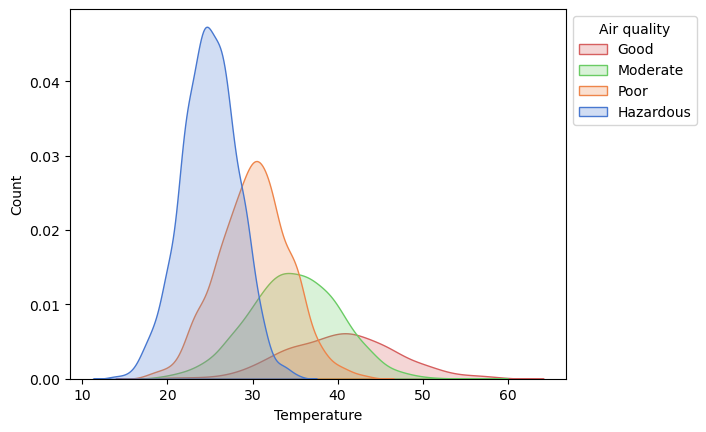

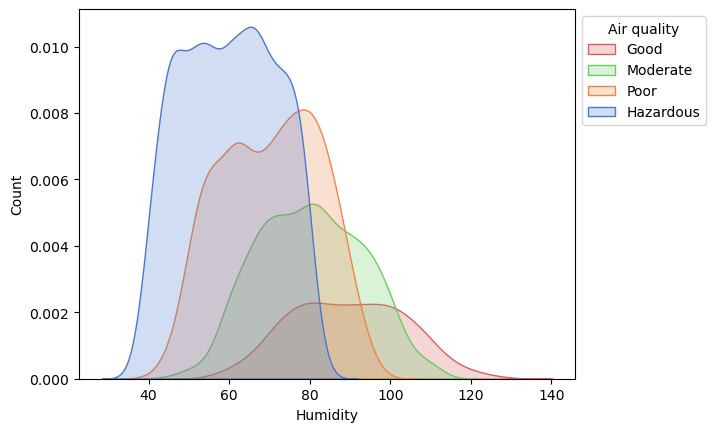

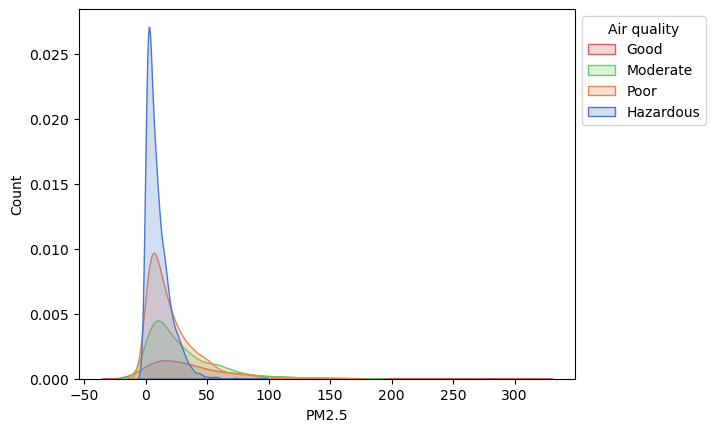

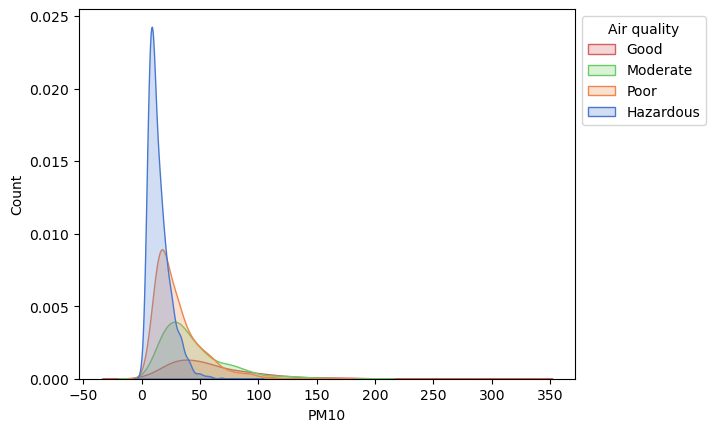

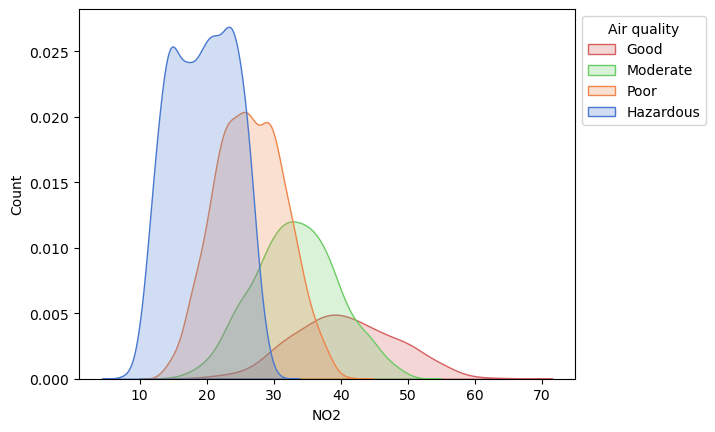

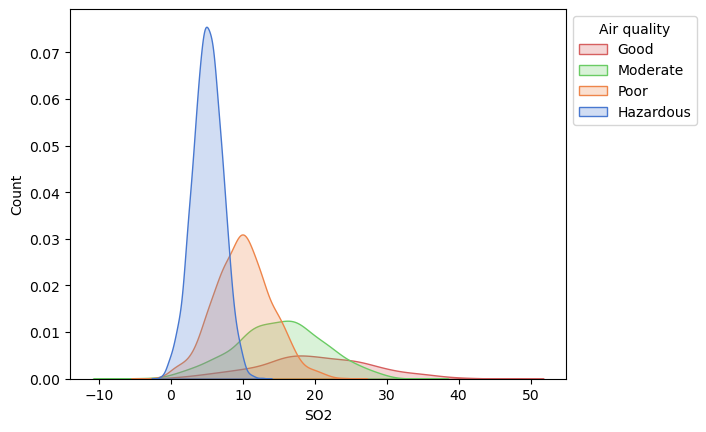

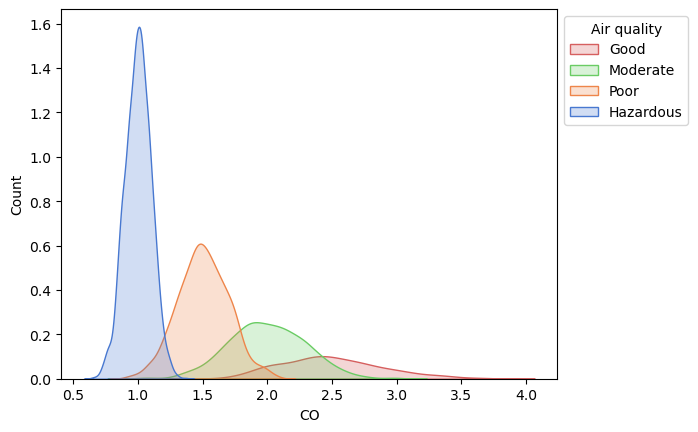

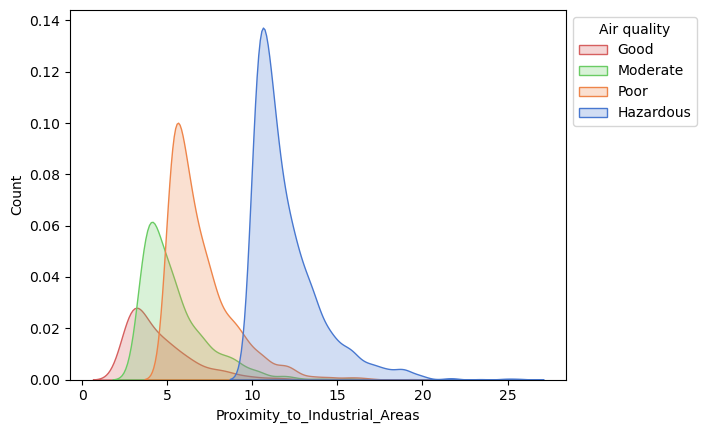

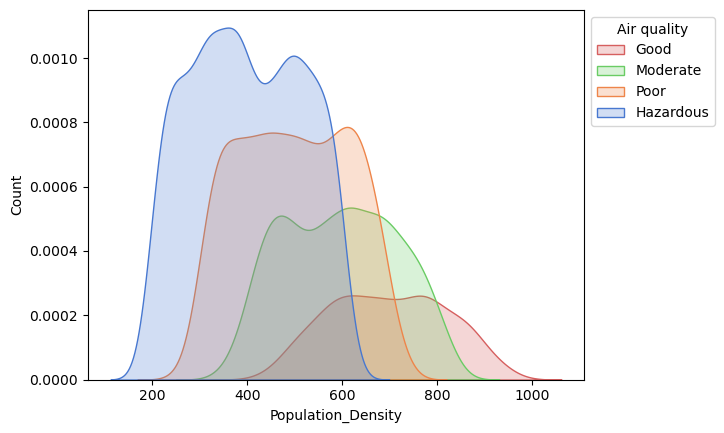

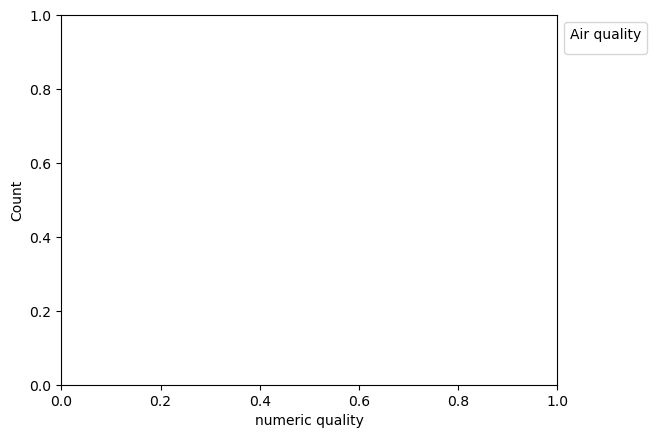

In [304]:
for col_name in numeric_pollution_data.columns:
    ax = sns.kdeplot(data=numeric_pollution_data, x=col_name, hue='numeric quality', fill=True, palette='muted', warn_singular=False)
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.legend(title='Air quality', loc='upper left', labels=["Good", "Moderate", "Poor", "Hazardous"])
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()